In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from matplotlib import pyplot

from sklearn.tree import export_graphviz
from six import StringIO
#from sklearn.externals.six import StringIO #doesn't exist in scicit learn 0.23
from IPython.display import Image  
import pydotplus


# Pre processing

In [ ]:
# Upload information file converted_data_eng.csv
url='https://drive.google.com/file/d/10w2XYLa738ExI2D7z1laWRjQa7M9g6pT/view?usp=sharing'
path='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
# Categorize failue modes to numeric values from blocked Lego: 1 to Waiting_time :8
classes = {'Blocked_Lego': 1, 'Fallen_Lego': 2, 'Machine_Downtime_Long': 3, 'Machine_Downtime_Short': 4, 'Normalfall': 5, 'Reduced_Motorspeed': 6, 'Unplanned_Maintenance': 7, 'Waiting_Time': 8}
# data['failure_class'] = data['failure_mode'].map(classes)
data['failure_class'] = data['failure_mode'].map(classes)

data = data.drop(['failure_mode'], axis = 1)

In [ ]:
data.head()

,cycle_time,duration_cam,duration_end,wait,fork_light_barrier,acc_sensor,motor_temp,Lego_check,width_Lego,length_Lego,horizontal_distance,vertical_distance,failure_class
0,00:00:02,00:00:02,00:00:00,00:05:39,1,2.6416,28.5206,1,164.23,246.44,-0.032533,-0.389930,7
1,00:00:02,00:00:02,00:00:00,00:07:05,1,2.6519,26.7138,1,163.77,246.32,-0.033498,-0.367090,7
2,00:00:02,00:00:01,00:00:01,00:00:03,1,2.6487,24.1249,1,163.53,246.42,-0.038323,-0.366120,5
3,00:00:07,00:00:07,00:00:00,00:00:03,1,2.6484,28.7740,1,163.35,246.28,0.025371,-0.016770,1
4,00:00:02,00:00:01,00:00:01,00:00:03,1,2.6513,27.0664,1,163.36,246.68,0.021510,-0.024169,5


In [ ]:
Zyklus_neu = []
Dauer_Kamera_neu = []
Dauer_Ende_neu = []
Wartezeit_neu = []


for x in data['cycle_time']:
    (h, m, s) = x.split(':')
    x = int(h) * 3600 + int(m) * 60 + int(s)
    Zyklus_neu.append(x)
    
data['cycle_time'] = Zyklus_neu

for x in data['duration_cam']:
    (h, m, s) = x.split(':')
    x = int(h) * 3600 + int(m) * 60 + int(s)
    Dauer_Kamera_neu.append(x)
    
data['duration_cam'] = Dauer_Kamera_neu

for x in data['duration_end']:
    (h, m, s) = x.split(':')
    x = int(h) * 3600 + int(m) * 60 + int(s)
    Dauer_Ende_neu.append(x)
    
data['duration_end'] = Dauer_Ende_neu


for x in data['wait']:
    (h, m, s) = x.split(':')
    x = int(h) * 3600 + int(m) * 60 + int(s)
    Wartezeit_neu.append(x)
    
data['wait'] = Wartezeit_neu


In [ ]:
data.head(5)

,cycle_time,duration_cam,duration_end,wait,fork_light_barrier,acc_sensor,motor_temp,Lego_check,width_Lego,length_Lego,horizontal_distance,vertical_distance,failure_class
0,2,2,0,339,1,2.6416,28.5206,1,164.23,246.44,-0.032533,-0.389930,7
1,2,2,0,425,1,2.6519,26.7138,1,163.77,246.32,-0.033498,-0.367090,7
2,2,1,1,3,1,2.6487,24.1249,1,163.53,246.42,-0.038323,-0.366120,5
3,7,7,0,3,1,2.6484,28.7740,1,163.35,246.28,0.025371,-0.016770,1
4,2,1,1,3,1,2.6513,27.0664,1,163.36,246.68,0.021510,-0.024169,5


# Spliting and training of data

In [ ]:
#split dataset in features and target variable
feature_cols = ['cycle_time', 'duration_cam', 'duration_end', 'wait', 'fork_light_barrier', 'acc_sensor', 'motor_temp', 'Lego_check', 'width_Lego', 'length_Lego', 'horizontal_distance', 'vertical_distance']
X = data[feature_cols] # Features (independent variables)
y = data.failure_class # Target variable


In [ ]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False) 

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2))

Accuracy: 97.9


In [ ]:
counter = list(range(0, 2328))
pred_df = pd.DataFrame(data=y_pred, index=counter, columns=['Fehlerklasse'])

pred_df.to_csv('pred_failure_class.csv')
y_test.to_csv('real_failure_class.csv')


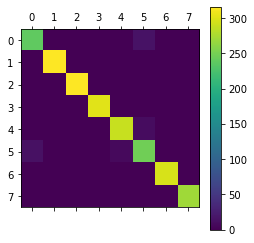

array([[239,   0,   0,   0,   1,  16,   0,   0],
       [  0, 316,   0,   0,   0,   0,   0,   0],
       [  0,   0, 316,   0,   0,   0,   0,   0],
       [  0,   0,   0, 302,   0,   0,   0,   0],
       [  0,   0,   0,   0, 290,  10,   0,   0],
       [ 14,   0,   0,   0,   8, 248,   0,   0],
       [  0,   0,   0,   0,   0,   0, 297,   0],
       [  0,   0,   0,   0,   0,   0,   0, 271]])

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt  

cm = confusion_matrix(y_test, pred_df)
plt.matshow(cm)
plt.colorbar()
plt.show()

cm

# Different kinds of depths and coefficients


In [ ]:
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Blocked_Lego', 'Fallen_Lego', 'Machine_Downtime_Long', 'Machine_Downtime_Short', 'Normalfall', 'Reduced_Motorspeed', 'Unplanned_Maintenance', 'Waiting_Time'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('error.png')
#Image(graph.create_png())

True

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9785223367697594


In [ ]:
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Blocked_Lego', 'Fallen_Lego', 'Machine_Downtime_Long', 'Machine_Downtime_Short', 'Normalfall', 'Reduced_Motorspeed', 'Unplanned_Maintenance', 'Waiting_Time'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('error_2.png')
#Image(graph.create_png())

True

## Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

Feature: 0, Score: 0.13048
Feature: 1, Score: 0.10511
Feature: 2, Score: 0.06390
Feature: 3, Score: 0.45382
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00971
Feature: 7, Score: 0.04358
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00084
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.19256


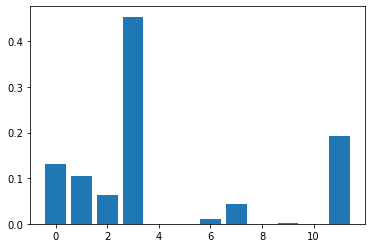

In [ ]:


importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Drop Features

In [ ]:
data = data.drop(['fork_light_barrier', 'acc_sensor', 'width_Lego', 'length_Lego', 'horizontal_distance'], axis = 1)

In [ ]:
data.head()

,cycle_time,duration_cam,duration_end,wait,motor_temp,Lego_check,vertical_distance,failure_class
0,2,2,0,339,28.5206,1,-0.389930,7
1,2,2,0,425,26.7138,1,-0.367090,7
2,2,1,1,3,24.1249,1,-0.366120,5
3,7,7,0,3,28.7740,1,-0.016770,1
4,2,1,1,3,27.0664,1,-0.024169,5


In [ ]:
#split dataset in features and target variable
feature_cols = ['cycle_time', 'duration_cam', 'duration_end', 'wait', 'motor_temp', 'Lego_check', 'vertical_distance']
X = data[feature_cols] # Features (independent variables)
y = data.failure_class # Target variable


In [ ]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False) 

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2))

Accuracy: 97.21


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth = 7)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2))

Accuracy: 98.11


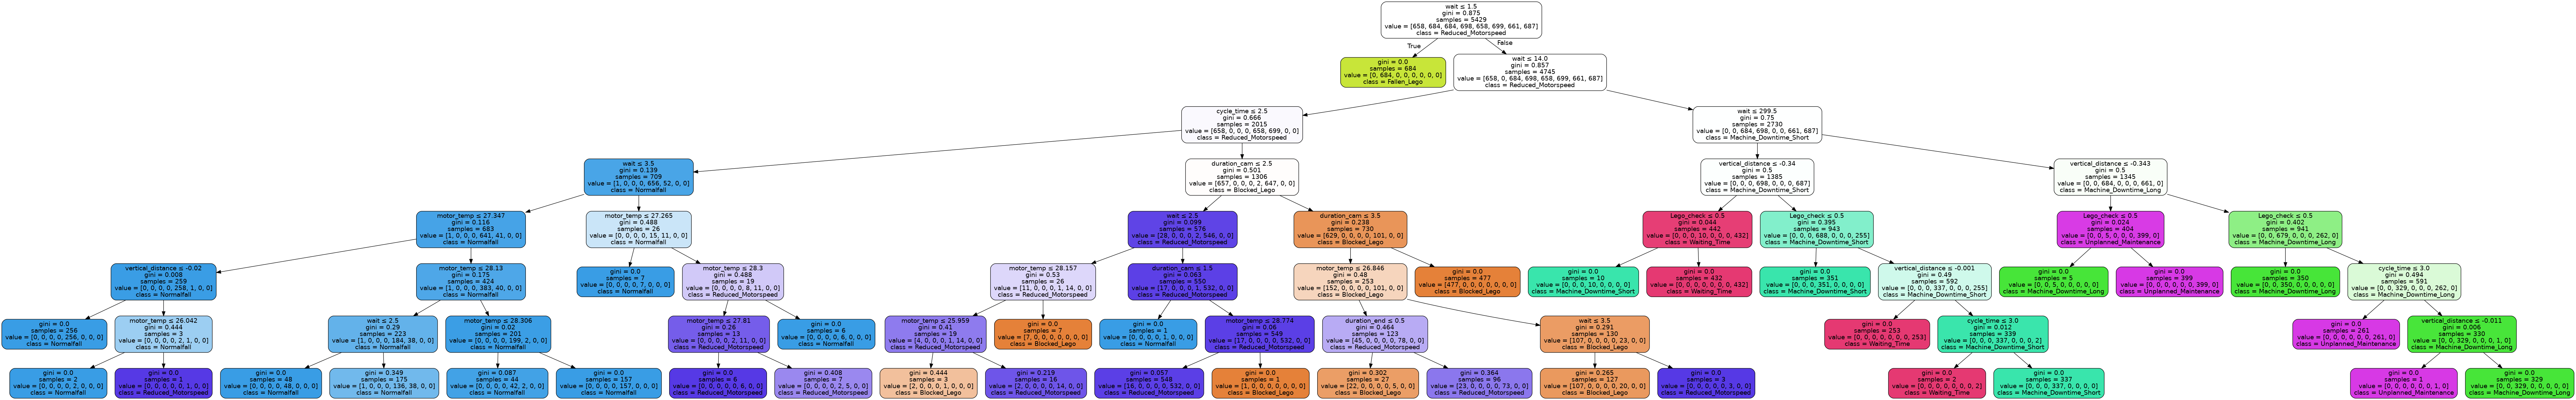

In [ ]:
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Blocked_Lego', 'Fallen_Lego', 'Machine_Downtime_Long', 'Machine_Downtime_Short', 'Normalfall', 'Reduced_Motorspeed', 'Unplanned_Maintenance', 'Waiting_Time'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('error_dropped.png')
Image(graph.create_png())

# Application and comparison of different algorithms

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth = 7)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
Decision_Tree = round(metrics.accuracy_score(y_test, y_pred_dt)*100, 2)
print('Decision Tree = ', Decision_Tree)

Decision Tree =  98.11


In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

Stochastic_Gradient_Decent = round(metrics.accuracy_score(y_test, y_pred_sgd)*100, 2)
print('Stochastic Gradient Decent = ', Stochastic_Gradient_Decent)

Stochastic Gradient Decent =  53.05


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

Random_Forest = round(metrics.accuracy_score(y_test, y_pred_rf)*100, 2)
print('Random Forest = ', Random_Forest)

Random Forest =  97.77


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)

Logistic_Regression = round(metrics.accuracy_score(y_test, y_pred_lr)*100, 2)
print('Logistic Regression = ', Logistic_Regression)

Logistic Regression =  72.85


/home/adm_schiffler/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)  
y_pred_knn = knn.predict(X_test)  

KNN = round(metrics.accuracy_score(y_test, y_pred_knn)*100, 2)
print('KNN = ', KNN)

KNN =  83.08


In [ ]:
##gaussian = GaussianNB() 
##gaussian.fit(X_train, y_train)  
##y_pred_bayes = gaussian.predict(X_test)  

##Bayes = round(metrics.accuracy_score(y_test, y_pred_bayes)*100, 2)
##print('Bayes = ', Bayes)

In [ ]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

y_pred_per = perceptron.predict(X_test)

Perceptron = round(metrics.accuracy_score(y_test, y_pred_per)*100, 2)
print('Perceptron = ', Perceptron)

Perceptron =  57.43


/home/adm_schiffler/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [ ]:
##linear_svc = LinearSVC()
##linear_svc.fit(X_train, y_train)

##y_pred_lsv = linear_svc.predict(X_test)

##LSV = round(metrics.accuracy_score(y_test, y_pred_lsv)*100, 2)
##print('LSVM = ', LSV)

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [KNN, Logistic_Regression, 
              Random_Forest, Perceptron, 
              Stochastic_Gradient_Decent, Decision_Tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(6)

,Model
Score,
98.11,Decision Tree
97.77,Random Forest
83.08,KNN
72.85,Logistic Regression
57.43,Perceptron
53.05,Stochastic Gradient Decent
